In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

### CSV

In [2]:
bank_train_csv = "data/processed/bank_train.csv"
bank_test_csv = "data/processed/bank_test.csv"
bank_val_csv = "data/processed/bank_val.csv"

labels_train = "data/processed/bank_train_labels.csv"
labels_test = "data/processed/bank_test_labels.csv"
labels_val = "data/processed/bank_val_labels.csv"

### Labels

In [3]:
labels_train_data = pd.read_csv(labels_train)
labels_train_data.drop(labels_train_data.columns[0], axis=1, inplace=True)

labels_test_data = pd.read_csv(labels_test)
labels_test_data.drop(labels_test_data.columns[0], axis=1, inplace=True)

labels_val_data = pd.read_csv(labels_val)
labels_val_data.drop(labels_val_data.columns[0], axis=1, inplace=True)

### Features

In [4]:
bank_train_data = pd.read_csv(bank_train_csv)
bank_test_data = pd.read_csv(bank_test_csv)
bank_val_data = pd.read_csv(bank_val_csv)

bank_train_data.drop(bank_train_data.columns[0], axis=1, inplace=True)
bank_test_data.drop(bank_test_data.columns[0], axis=1, inplace=True)
bank_val_data.drop(bank_val_data.columns[0], axis=1, inplace=True)

#### Combining test and validation data

In [5]:
x_test = pd.concat([bank_test_data, bank_val_data], ignore_index=True)
y_test = pd.concat([labels_test_data, labels_val_data], ignore_index=True)

### Logistic Regression

In [32]:
sv_classifier = SVC(C=0.8,
                    kernel="linear",
                    degree=5)

history = sv_classifier.fit(bank_train_data, labels_train_data["target"])

In [33]:
y_pred = sv_classifier.predict(x_test)

# probabilities = sv_classifier.predict_proba(x_test)

### Custom Threshold

In [34]:
# positive_prob = probabilities[:,1]

# threshold = 0.2

# custom_predictions = (positive_prob > threshold).astype(int)

In [35]:
confusionMatrix = confusion_matrix(y_test, y_pred)
confusionMatrixNorm = confusion_matrix(y_test, y_pred, normalize='pred')

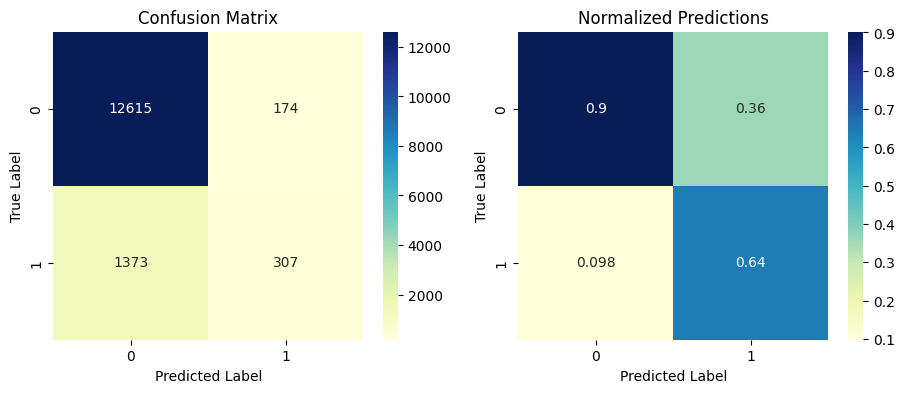

In [36]:
fig, axes = plt.subplots(1,2, figsize=(11,4))

sns.heatmap(confusionMatrix, annot=True, ax=axes[0], cmap='YlGnBu', fmt="d")
axes[0].set_title("Confusion Matrix")
axes[0].set_ylabel("True Label")
axes[0].set_xlabel("Predicted Label")

sns.heatmap(confusionMatrixNorm, annot=True, cmap='YlGnBu', ax=axes[1])
axes[1].set_title("Normalized Predictions")
axes[1].set_ylabel("True Label")
axes[1].set_xlabel("Predicted Label")

plt.show()

### Classification Report

In [37]:
target_names = ['Unsuccessful', 'Successful']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

Unsuccessful       0.90      0.99      0.94     12789
  Successful       0.64      0.18      0.28      1680

    accuracy                           0.89     14469
   macro avg       0.77      0.58      0.61     14469
weighted avg       0.87      0.89      0.87     14469

